In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv"
df = pd.read_csv(url, header=0)
df = df.fillna('null')
df = df.replace(to_replace=('\(', '\)','0 0'), value="", regex=True)

In [12]:
df.shape #how many rows and cols

(138151, 29)

In [13]:
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria Elevation, preliminary version",Otto Wagner,6210,"Austrian, 1841–1918",Austrian,1841,1918,Male,1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167,null,null,null,48.6,null,null,168.9,null,null
1,"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",Christian de Portzamparc,7470,"French, born 1944",French,1944,0,Male,1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a,null,null,null,40.6401,null,null,29.8451,null,null
2,"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=fdcfca4db3acac1f,null,null,null,34.3,null,null,31.8,null,null
3,"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,7056,"French and Swiss, born Switzerland 1944",,1944,0,Male,1980,Photographic reproduction with colored synthetic laminate,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c89b9071486760a5,null,null,null,50.8,null,null,50.8,null,null
4,"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, color pencil, ink, and gouache on tracing paper",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=b21f3d10def77da9,null,null,null,38.4,null,null,19.1,null,null


In [14]:
#explore random artworks
import random
#random range limited by length of df
r = random.randint(0, df.shape[0])
df.loc[r]

Title                                                       Plate page 161 from Monsieur Aa l'antiphilosophe: Volume I from L'Antitête
Artist                                                                                                                       Max Ernst
ConstituentID                                                                                                                     1752
ArtistBio                                                                                 French and American, born Germany. 1891–1976
Nationality                                                                                                                     French
BeginDate                                                                                                                         1891
EndDate                                                                                                                           1976
Gender                                                 

In [15]:
#use df.sample() instead to randomly select pandas rows
pd.options.display.max_colwidth = 1000
df["URL"].sample(1)

10703    null
Name: URL, dtype: object

In [16]:
#genderBalance
genderBalance = df["Gender"].value_counts(normalize=True)
type(genderBalance)
#genderBalance to df
#make graph
print(genderBalance.to_string())
#blank entry means NAN

Male                                                                                                                                                                                                                                                                        0.753813
Female                                                                                                                                                                                                                                                                      0.128997
                                                                                                                                                                                                                                                                            0.053261
Male Male                                                                                                                                                                

In [17]:
male_count  = df["Gender"].str.match("Male").sum()
print(male_count)

109021


In [18]:
female_count = df["Gender"].str.match("Female").sum()
print(female_count)

18945


In [19]:
gender_factor = male_count/female_count
print("Men are "+str(gender_factor)+" times more likely to be represented at MOMA") 

Men are 5.75460543679071 times more likely to be represented at MOMA


In [20]:
#You can also rewrite this using string formatting
gender_factor = male_count/female_count
print("Men are {} times more likely to be represented at MOMA".format(gender_factor)) 

Men are 5.75460543679071 times more likely to be represented at MOMA


In [21]:
#more examples: https://kanoki.org/2019/03/27/pandas-select-rows-by-condition-and-string-operations/

## How do gender ratios change from year year? 

In [22]:
female_count_1967 = df[(df['Date'] == "1967") & (df['Gender'] == "Female") ]
female_count_1967.shape[0]

244

In [23]:
male_count_1967 = df[(df['Date'] == "1967") & (df['Gender'] == "Male") ]
male_count_1967.shape[0]

1508

In [24]:
gender_factor_1967 = male_count_1967.shape[0]/female_count_1967.shape[0]
print("Men are "+str(gender_factor_1967)+" times more likely to be represented at MOMA in 1967") 

Men are 6.180327868852459 times more likely to be represented at MOMA in 1967


In [25]:
gender_factor_1967 = male_count_1967.shape[0]/female_count_1967.shape[0]
print("Men are {} times more likely to be represented at MOMA in 1967".format(gender_factor_1967)) 

Men are 6.180327868852459 times more likely to be represented at MOMA in 1967


In [26]:
#get all years represented
df_cleanyears = df[["Date", "Gender"]]
yearlist = df_cleanyears["Date"].unique()
yearlist_cleaned = [ x for x in yearlist if x.isdigit() and len(x) == 4 ]
# yearlist_cleaned

In [27]:
years = df_cleanyears["Date"]
df_cleanyears = df_cleanyears[(years.str.len() == 4) & (years.str.isdigit())].astype({"Date":int})

In [28]:
df_cleanyears.sort_values("Date", inplace=True)
df_cleanyears.head()

,Date,Gender
1988,1768,Male
82086,1768,Male
82089,1768,Male
82087,1768,Male
82088,1768,Male


In [29]:
#Crosstab counts the number of males and females by year.
ct = pd.crosstab(df_cleanyears.Date, df_cleanyears.Gender)[["Male", "Female"]]

In [30]:
(ct==1).sum()

Gender
Male      7
Female    9
dtype: int64

In [31]:
ct[ct.Male == 2]

Gender,Male,Female
Date,,
1832,2,0
1840,2,0
1841,2,0


Adding 1 to male, so we don't divide by  0

In [32]:
ct.loc[1843, "Male"] += 1

In [33]:
ratio = ct["Female"]/ct["Male"]

Text(0, 0.5, 'Ratio')

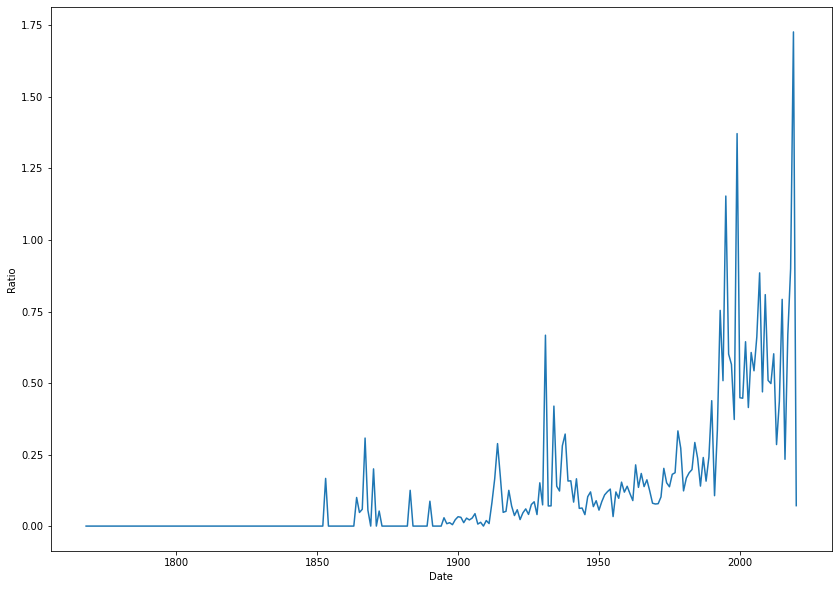

In [34]:
ratio.plot(figsize = (14, 10))
plt.ylabel("Ratio")

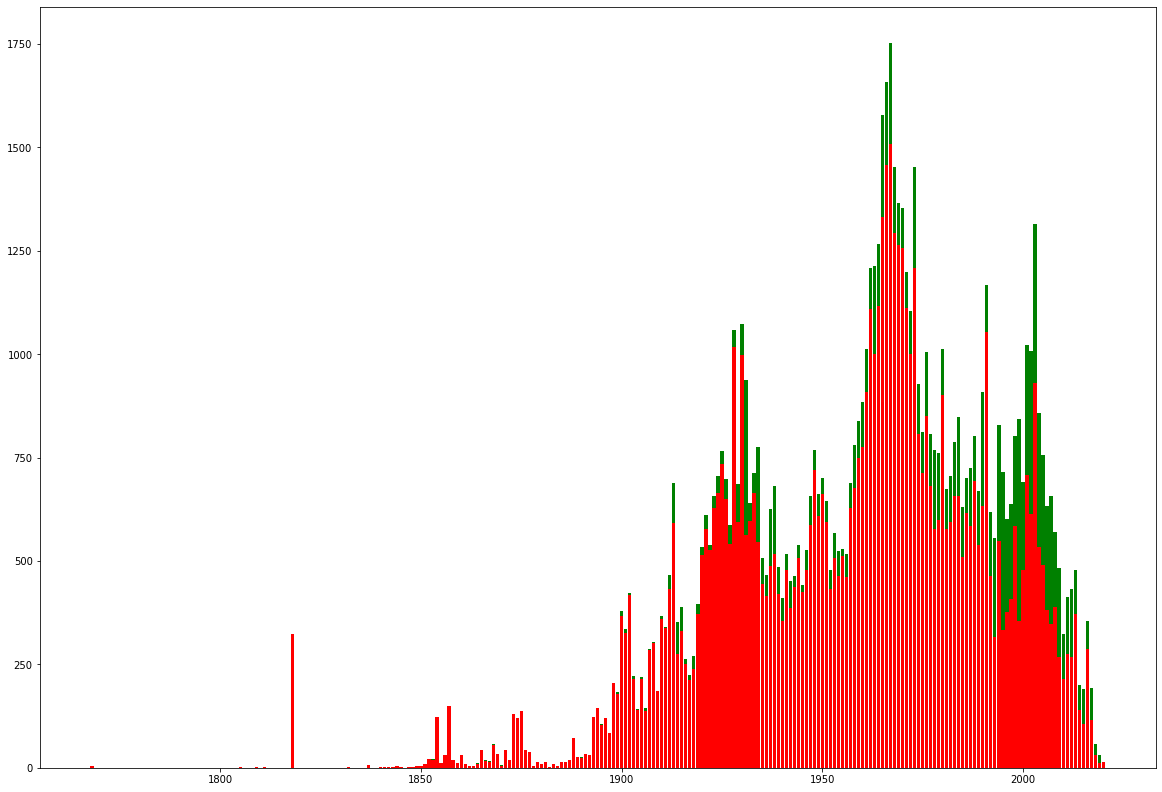

In [36]:
fig, ax = plt.subplots(figsize = (20, 14))

ax.bar(ct.index, ct["Male"], color='r')
ax.bar(ct.index, ct["Female"], bottom=ct["Male"], color='g')

plt.show()

In [69]:
#When was artwork created? 
dfcopy = df[df[['Date']].apply(lambda x: x[0].isdigit(), axis=1)]
dfcopy2 = dfcopy[dfcopy[['Date']].apply(lambda x: len(x[0]) == 4, axis=1)]#get the bad data out
#dfcopy['Date'] = dfcopy['Date'].astype(int)
dfcopy2.sort_values(by=['Date'])
#make a sorted series
creation = dfcopy2["Date"].value_counts(normalize=True)
print(creation.to_string())

1967    0.027668
1966    0.026855
1971    0.026184
1968    0.024857
1965    0.023930
1973    0.022032
1969    0.021789
1964    0.020705
1962    0.019806
1963    0.018593
1991    0.017680
1972    0.017052
1928    0.016153
1976    0.015525
1931    0.015397
1961    0.015054
1974    0.014598
1977    0.013599
1984    0.013556
1983    0.012771
1959    0.012643
1978    0.012600
1999    0.012586
1994    0.012571
1975    0.012414
1998    0.012372
1988    0.012229
1979    0.012200
1958    0.011658
1957    0.011630
1934    0.011473
1925    0.011473
1989    0.011330
1948    0.011301
1987    0.011159
1913    0.011159
1986    0.011144
1995    0.011087
1981    0.010959
1929    0.010945
1982    0.010830
1924    0.010688
1926    0.010631
1985    0.010588
1933    0.010488
1932    0.010417
1938    0.010160
1923    0.009989
1949    0.009917
1997    0.009860
1992    0.009646
1947    0.009632
1937    0.009561
1996    0.009389
1951    0.009375
1927    0.009204
1921    0.009204
1993    0.008747
1953    0.0086

Text(0, 0.5, 'Creation')

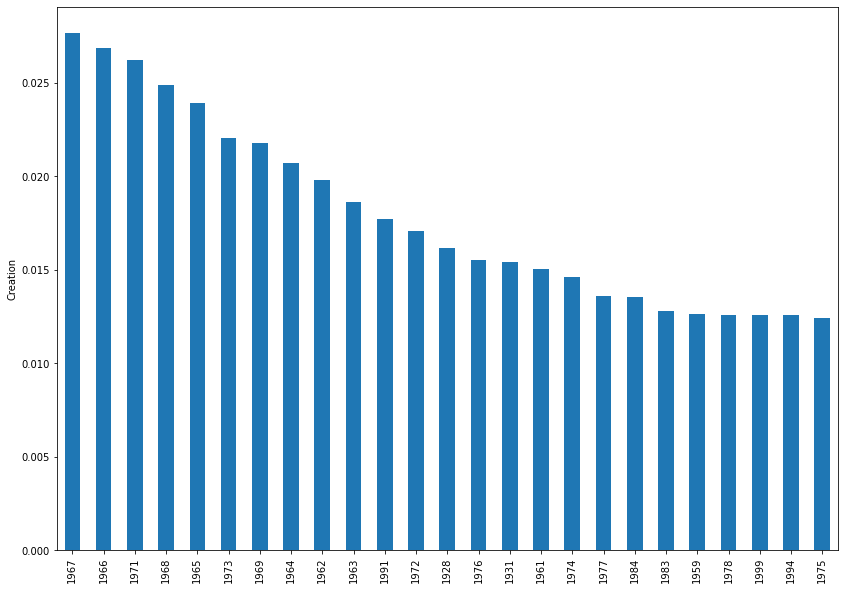

In [74]:
creationTop = creation.head(25)
creationTop.plot.bar(figsize = (14, 10))
plt.ylabel("Creation")

In [9]:
#what is the tally of origins?
originBalance = df["Nationality"].value_counts(normalize=True)
print(originBalance.to_string())

American                                                                                                                                                                                                                                                                                                                                                                                                                                  0.412324
French                                                                                                                                                                                                                                                                                                                                                                                                                                    0.163509
German                                                                                                                            

In [12]:
type(originBalance)

pandas.core.series.Series

In [15]:
dfOrigin = pd.DataFrame({'nationality':originBalance.index, 'percentage':originBalance.values})
dfOrigin.head()

,nationality,percentage
0,American,0.412324
1,French,0.163509
2,German,0.066876
3,,0.045660
4,British,0.040362


In [16]:
dfOrigin.to_csv("momaorigins.csv", index = False)

In [11]:
dfCreated = pd.DataFrame({'year':creation.index, 'percentage':creation.values})
dfCreated['year']= dfCreated['year'].astype(str)
dfCreated.head()

,year,percentage
0,1967,0.020910
1,1966,0.020295
2,1971,0.019789
3,197,0.018861
4,1968,0.018786


In [64]:
mean = dfCreated[:20].percentage.mean()

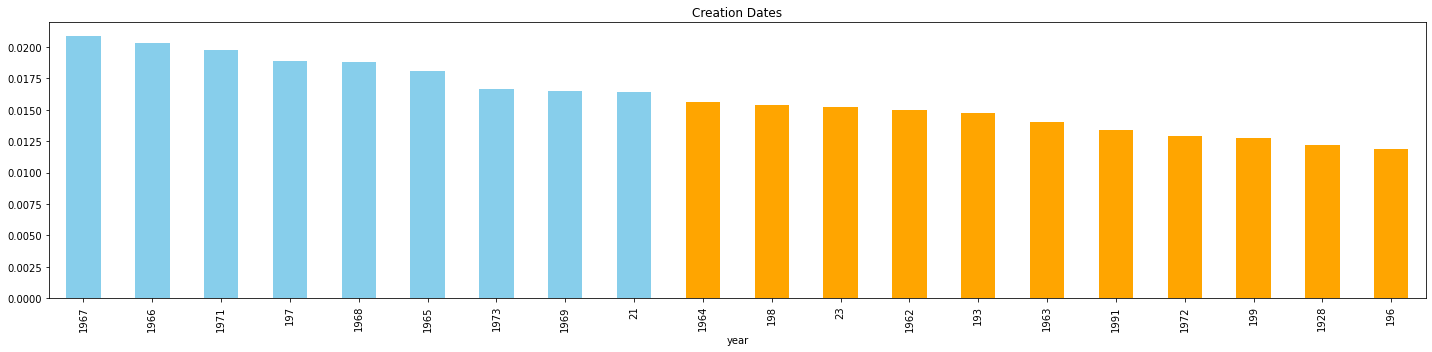

In [65]:
fig, ax = plt.subplots(figsize=(20, 5))
#plot only top 20
dfCreated[:20].plot.bar(x='year',
                      y='percentage',
                      ax=ax,
                      color=np.where(dfCreated['percentage'] < mean, 'orange', 'skyblue'))
ax.set_title("Creation Dates")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig('CreationDates.png', dpi=1000)
plt.show()